# Correr una regresion lineal

In [13]:
# IMPORTO LAS LIBRERIAS NECESARIAS
import pymongo
import numpy as np
import matplotlib.pyplot as plt #dibujar
import pandas as pd
from sklearn.linear_model import LinearRegression #correr regresion lineal

client = pymongo.MongoClient('localhost',27017)
#print(client.list_database_names()) #muestra los nombres de las bases
db = client['CCCba'] #monto la base en la variable db
#print(db.list_collection_names()) #muestra las colecciones en esa base

col = db.CCCba_collection #Carga la coleccion en la variable col
col.count()
#sentencia para buscar dentro de la coleccion
#print(col)

#paso los datos de una collection de Mongo a DF de PANDAS

datos = pd.DataFrame(list(col.find()))
datos.head()




<ipython-input-13-0c529377135b>:14: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  col.count()


,_id,Fecha,Casos registrados Ciudad de Córdoba (acumulado),Casos registrados Provincia de Córdoba (acumulado),Fallecidos Provincia de Córdoba (acumulado),Nuevos casos registrados Ciudad de Córdoba,Nuevos casos registrados Provincia de Córdoba,Nuevos Fallecidos Provincia de Córdoba
0,61267cfd59ffc90eb04ddba9,2020-03-25,21,49,0,0,0,0
1,61267cfd59ffc90eb04ddbaa,2020-03-26,22,52,0,1,3,0
2,61267cfd59ffc90eb04ddbab,2020-03-28,24,56,0,2,4,0
3,61267cfd59ffc90eb04ddbac,2020-03-29,30,73,0,6,17,0
4,61267cfd59ffc90eb04ddbad,2020-03-30,30,80,0,0,7,0


# GRAFICAR DATOS

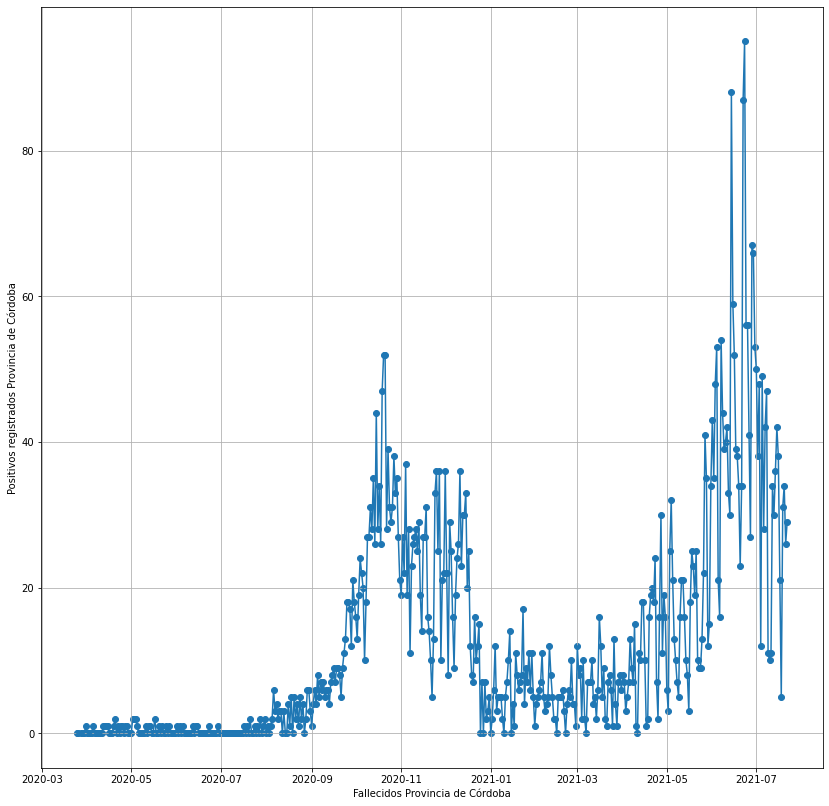

In [18]:
#DEFINO EL TAMAÑO DEL GRAFICO
fig = plt.figure(figsize=(14,14)) 

#Nube de puntos
#plt.scatter(x,y)
plt.scatter(datos['Fecha'],datos['Nuevos Fallecidos Provincia de Córdoba']) 
#plt.plot(x,y)
plt.plot(datos['Fecha'],datos['Nuevos Fallecidos Provincia de Córdoba'])

#plt.plot(datos['Nuevos casos registrados Provincia de Córdoba'],datos['Fecha'])

#defino titulos
plt.xlabel('Fallecidos Provincia de Córdoba')
plt.ylabel('Positivos registrados Provincia de Córdoba')
plt.grid()